## Polynomial Regression:

Linear regression requires the relation between the dependent variable and the independent variable to be linear. What if the distribution of the data was more complex as shown in the below figure? Can linear models be used to fit non-linear data? How can we generate a curve that best captures the data as shown below?

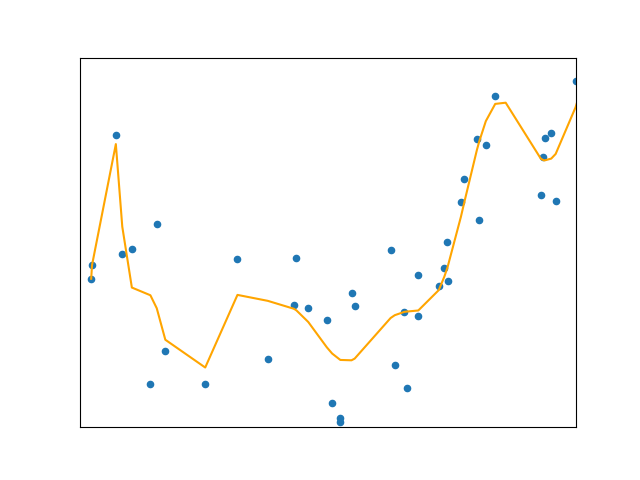

### Table of Contents:

Why Polynomial Regression

Over-fitting vs Under-fitting

Bias vs Variance trade-offs

Applying polynomial regression to the Boston housing dataset.

## Why Polynomial Regression

To understand the need for polynomial regression, let’s generate some random dataset first.

In [58]:
import numpy as np
import matplotlib.pyplot as plt 


In [143]:
np.random.seed(0)

## The seed() method is used to initialize the random number generator. The random number generator needs a number to start with (a seed value), to be able to generate a random number. By default the random number generator uses the current system time.

In [144]:
x = 2-3*np.random.normal(0,1,20)


In [145]:
x

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [146]:
x.shape  ## It has 20 rows

(20,)

In [147]:
y= x - 2 * (x**2) + 0.5 * (x**3) + np.random.normal(-3,3,20)

In [148]:
type(y)

numpy.ndarray

In [149]:
y

array([ -53.46841187,   -1.26255958,   -3.50619264, -107.22320039,
        -49.13195018,    8.90122353,   -5.46624176,   -5.76263165,
         -0.60058568,    1.2226779 ,   -3.95663744,  -21.98989452,
         -6.11812275,  -10.46843964,   -4.11955719,   -3.02941914,
        -21.76152272,   -1.51295226,   -4.75491157,    6.50723268])

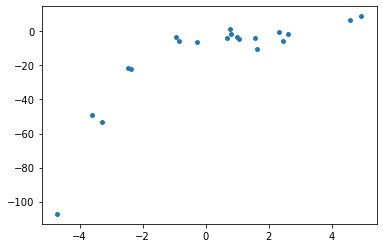

In [150]:
plt.scatter(x,y,s=15)
plt.show()

#### Let’s apply a linear regression model to this dataset.


In [151]:
from sklearn.linear_model import LinearRegression

In [152]:
x=x[:,np.newaxis]
y=y[:,np.newaxis]

In [153]:
x

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

In [154]:
x.shape  ## This is what we call col_vector tranformation

(20, 1)

In [39]:
y=y[:,np.newaxis]


In [155]:
lr = LinearRegression()

In [37]:
lr.fit(x,y)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [40]:
y.shape  ## This is because I ran that commands several times

(20, 1, 1, 1, 1)

In [51]:
## After loading from start
y=y[:,np.newaxis]

In [52]:
y.shape

(20, 1)

In [53]:
x=x[:,np.newaxis]
x.shape

(20, 1)

In [156]:
lr.fit(x,y)

LinearRegression()

In [157]:
y_pred = lr.predict(x)

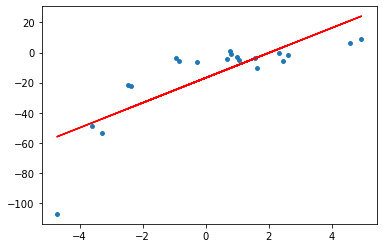

In [158]:
plt.scatter(x,y,s=15)
plt.plot(x,y_pred,color='r')
plt.show()

In [159]:
## When data is distribued non linear , the straight regression line does not work well as it does not captures overall data.

We can see that the straight line is unable to capture the "patterns" in the data. This is an example of under-fitting. Computing the RMSE and R²-score of the linear line gives:

    RMSE of linear regression is 15.908242501429998.
    R2 score of linear regression is 0.6386750054827146
    

#### To overcome under-fitting, we need to increase the complexity of the model.

To generate a higher order equation we can add powers of the original features as new features. The linear model," Y= 0o + 01x "can be transformed to " Y= 0o+01x+02x**2 ".  (0 = theta)


#### To convert the original features into their higher order terms we will use the PolynomialFeatures class provided by scikit-learn. 

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [161]:
poly = PolynomialFeatures(degree = 2)

In [162]:
x_poly=poly.fit_transform(x)

In [163]:
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

In [164]:
x

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

In [165]:
## Now that we have both x and x**2 in our x_poly, we will now apply linear regression model on this

In [166]:
lr.fit(x_poly,y)

LinearRegression()

In [167]:
y_poly_pred =lr.predict(x_poly)

In [168]:
y_poly_pred

array([[-51.70395899],
       [ -0.3768314 ],
       [-15.49084857],
       [-82.51360898],
       [-57.82529579],
       [ -3.8842325 ],
       [-14.51152638],
       [  4.89510132],
       [  4.7901049 ],
       [ -0.56263917],
       [  3.18023781],
       [-35.26006027],
       [ -8.65246595],
       [  3.39960586],
       [ -1.17590986],
       [  0.73130614],
       [-37.21553918],
       [  4.93206451],
       [  1.04847428],
       [ -1.30607467]])

In [169]:
## Calculating scores:
### Root mean square error
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2_score = r2_score(y,y_poly_pred)

In [170]:
print(rmse)
print(r2_score)

10.120437473614711
0.8537647164420812


### We can see that RMSE has decreased and R²-score has increased as compared to the linear line.

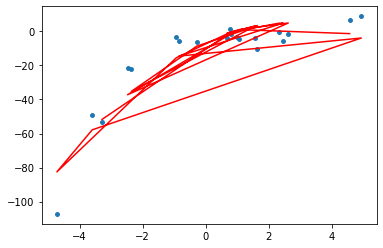

In [171]:
## Plotting       

plt.scatter(x,y,s=15)
plt.plot(x,y_poly_pred,color='red')
plt.show()

In [172]:
## I don't know why, but we need to sort values of x before line plot.

In [173]:
x

array([[-3.29215704],
       [ 0.79952837],
       [-0.93621395],
       [-4.7226796 ],
       [-3.60267397],
       [ 4.93183364],
       [-0.85026525],
       [ 2.45407162],
       [ 2.30965656],
       [ 0.76820449],
       [ 1.56786929],
       [-2.36282052],
       [-0.28311318],
       [ 1.63497495],
       [ 0.6684103 ],
       [ 0.99897702],
       [-2.48223722],
       [ 2.61547479],
       [ 1.0607969 ],
       [ 4.56228722]])

In [139]:
import operator

In [93]:
sort_axis = operator.itemgetter(0)

In [94]:
sort_axis

operator.itemgetter(0)

In [95]:
sorted_zip = sorted(zip(x,y_poly_pred), key = sort_axis)

In [96]:
sorted_zip

[(array([-4.7226796]), array([-82.51360898])),
 (array([-3.60267397]), array([-57.82529579])),
 (array([-3.29215704]), array([-51.70395899])),
 (array([-2.48223722]), array([-37.21553918])),
 (array([-2.36282052]), array([-35.26006027])),
 (array([-0.93621395]), array([-15.49084857])),
 (array([-0.85026525]), array([-14.51152638])),
 (array([-0.28311318]), array([-8.65246595])),
 (array([0.6684103]), array([-1.17590986])),
 (array([0.76820449]), array([-0.56263917])),
 (array([0.79952837]), array([-0.3768314])),
 (array([0.99897702]), array([0.73130614])),
 (array([1.0607969]), array([1.04847428])),
 (array([1.56786929]), array([3.18023781])),
 (array([1.63497495]), array([3.39960586])),
 (array([2.30965656]), array([4.7901049])),
 (array([2.45407162]), array([4.89510132])),
 (array([2.61547479]), array([4.93206451])),
 (array([4.56228722]), array([-1.30607467])),
 (array([4.93183364]), array([-3.8842325]))]

In [97]:
x,y_poly_pred = zip(*sorted_zip)

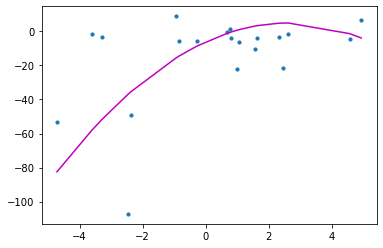

In [99]:
plt.scatter(x,y,s=10)
plt.plot(x,y_poly_pred,color='m')
plt.show()     
## This is wrong , though output is same because the output was of previous cose written on this cell
## It is wrong because the right format is written in below cell

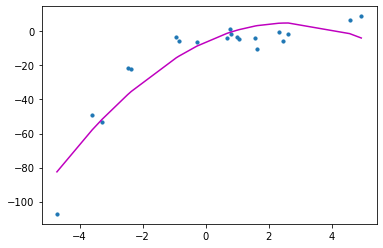

In [174]:
plt.scatter(x,y,s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key = sort_axis)  ## WHY ??
x,y_poly_pred = zip(*sorted_zip)
plt.plot(x,y_poly_pred,color='m')
plt.show()

##Fitting a linear regression model on the transformed features gives the below plot.

### It is quite clear from the plot that the quadratic curve is able to fit the data better than the linear line

If we try to fit a cubic curve (degree=3) to the dataset, we can see that it passes through more data points than the quadratic and the linear plots

In [ ]:
## Copied Graph: 

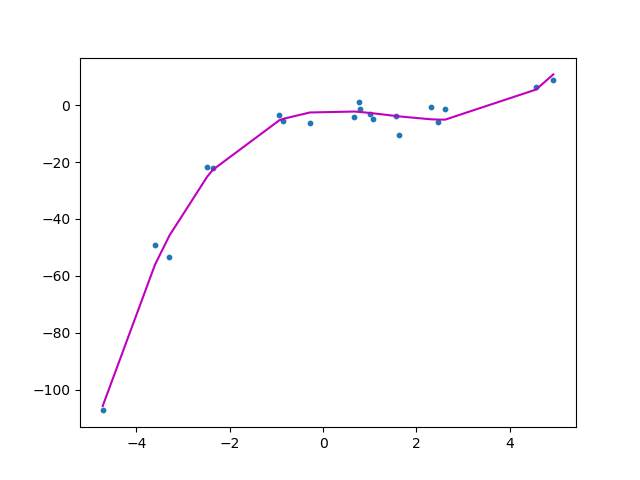

The metrics of the cubic curve is

     RMSE is 3.449895507408725
     R2 score is 0.9830071790386679

In [175]:
## The R2_score is almost 1 , which indicates that this model is pretty good and perfect fit
## Also, rmse score is less than other polynomial regression. 

#### Below is a comparison of fitting linear, quadratic and cubic curves on the dataset.


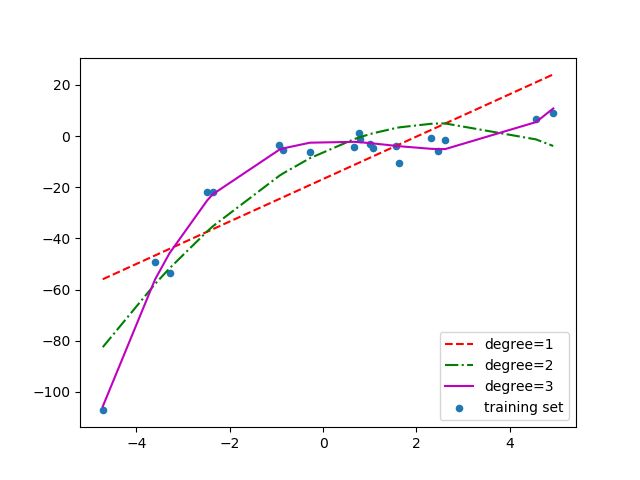

#### If we further increase the degree to 20, we can see that the curve passes through more data points. Below is a comparison of curves for degree 3 and 20.

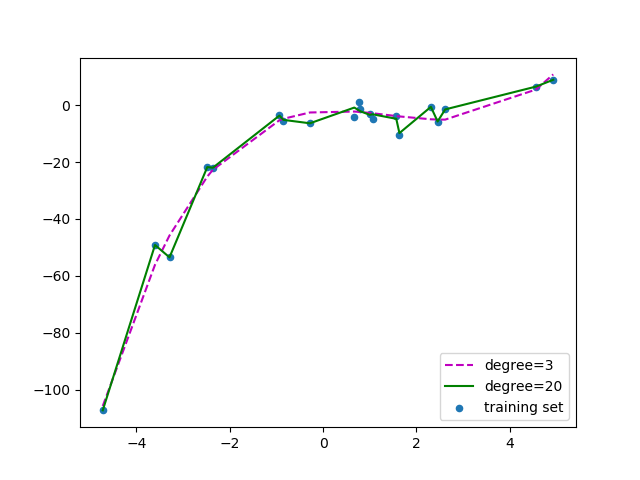

For degree=20, the model is also capturing the noise in the data. This is an example of over-fitting. Even though this model passes through most of the data, it will fail to generalize on unseen data.

#### **Note : To prevent over-fitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( Note: adding more data can be an issue if the data is itself noise).

### How do we choose an optimal model? To answer this question we need to understand the bias vs variance trade-off.

## The Bias vs Variance trade-off:

Bias refers to the error due to the model’s simplistic assumptions in fitting the data. A high bias means that the model is unable to capture the patterns in the data and this results in under-fitting.

#### Bias means the error of the training data

Variance refers to the error due to the complex model trying to fit the data. High variance means the model passes through most of the data points and it results in over-fitting the data.

#### Variance means the error of the test data

#### In overfitting , the accuracy for the training data goes high but the accuracy for test data remains low ( Low bias and High Variance )
#### In underfitting , the accuracy for the training data goes low and the accuracy for test data remains high ( High bias and Low variance )


### The Desired Model/Optimal Model has : Low bias and low variance

The below picture summarizes our learning:


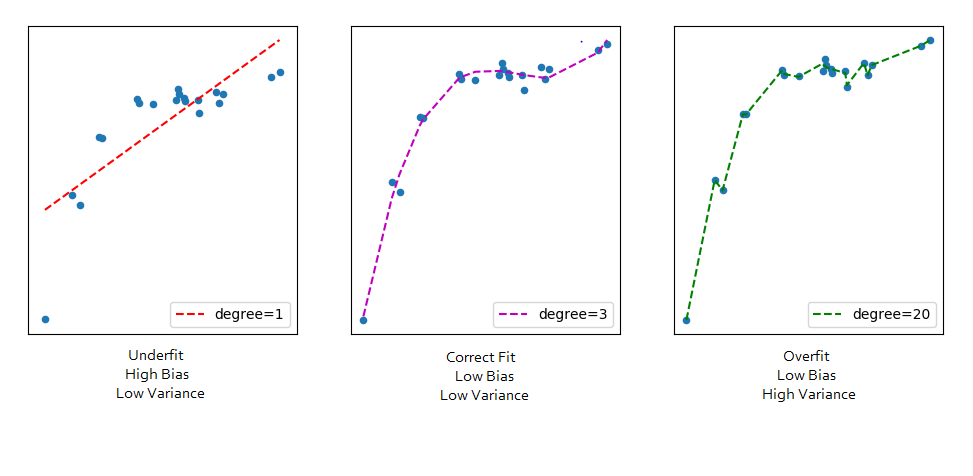

### From the below picture we can observe that as the model complexity increases, the bias decreases and the variance increases and vice-versa. Ideally, a machine learning model should have low variance and low bias. But practically it’s impossible to have both. Therefore to achieve a good model that performs well both on the train and unseen data, a trade-off is made.

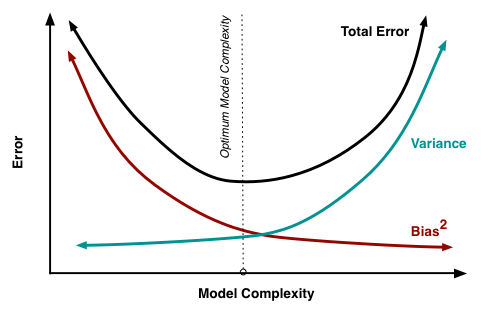

#### And this is how we choose optimal model , where both bias and variance is low as in the dotted line range